# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/scottlew/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


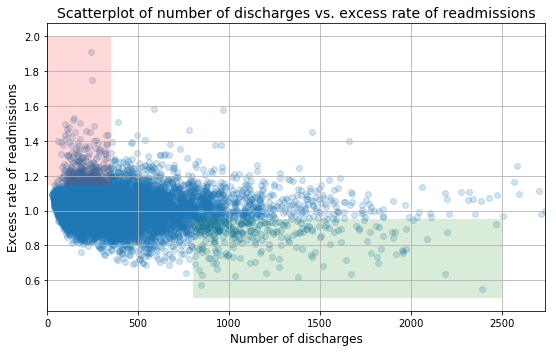

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
plt.savefig('hospital_readmissions.png')

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [9]:
clean_hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges            int64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [10]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [11]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [12]:
print(scipy.stats.pearsonr(clean_hospital_read_df['Excess Readmission Ratio'],clean_hospital_read_df['Number of Discharges']))

(nan, 1.0)


In [13]:
# split the data into two groups:  number of discharges < 100 &  number of discharges > 1000
mask_100 = clean_hospital_read_df['Number of Discharges'] < 100
mask_1000 = clean_hospital_read_df['Number of Discharges'] >  1000
discharge_less = clean_hospital_read_df[mask_100]['Excess Readmission Ratio']
discharge_more = clean_hospital_read_df[mask_1000]['Excess Readmission Ratio']

In [14]:
discharge_less =  discharge_less[~np.isnan(discharge_less)]

In [15]:
discharge_more 

11757    0.9192
821      1.1405
2363     1.0760
7188     0.9930
2341     1.0765
7473     0.9890
12428    0.8992
12862    0.8781
359      1.1941
12181    0.9076
13032    0.8670
13493    0.8085
7155     0.9934
9806     0.9574
1166     1.1187
13082    0.8636
13006    0.8683
1653     1.0975
13547    0.7931
6252     1.0061
10655    0.9432
13285    0.8426
6646     1.0002
13674    0.7325
3816     1.0447
8424     0.9769
298      1.2087
9120     0.9671
13231    0.8484
4355     1.0353
          ...  
7147     0.9935
897      1.1358
13326    0.8384
7872     0.9839
9444     0.9627
13723    0.6350
1605     1.0991
12910    0.8747
2758     1.0663
7934     0.9831
1352     1.1099
3042     1.0605
1448     1.1055
2846     1.0647
8249     0.9788
3202     1.0571
13730    0.5495
2440     1.0738
11545    0.9248
1805     1.0925
8818     0.9712
572      1.1637
136      1.2577
1698     1.0962
1242     1.1148
8126     0.9804
6643     1.0003
1892     1.0896
13615    0.7682
13666    0.7379
Name: Excess Readmission

In [16]:
print(len(discharge_less))
print()
print(len(discharge_more))

1188

463


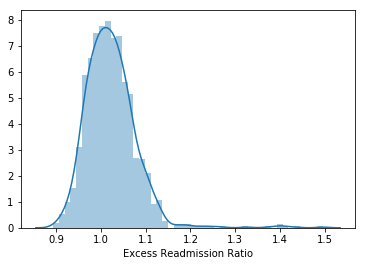

In [17]:
sns.distplot(discharge_less)

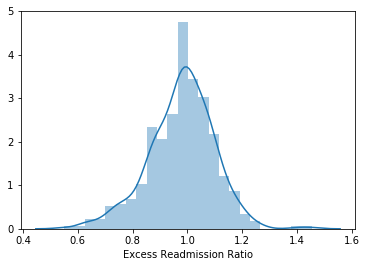

In [18]:
sns.distplot(discharge_more)

In [19]:
print('For number of discharges less than 100, mean excess readmission ratio:')
print(np.mean(discharge_less))

For number of discharges less than 100, mean excess readmission ratio:
1.0226183501683506


In [20]:
print('For number of discharges more than 1000, mean excess readmission ratio:')
print(np.mean(discharge_more))

For number of discharges more than 1000, mean excess readmission ratio:
0.9783354211663071


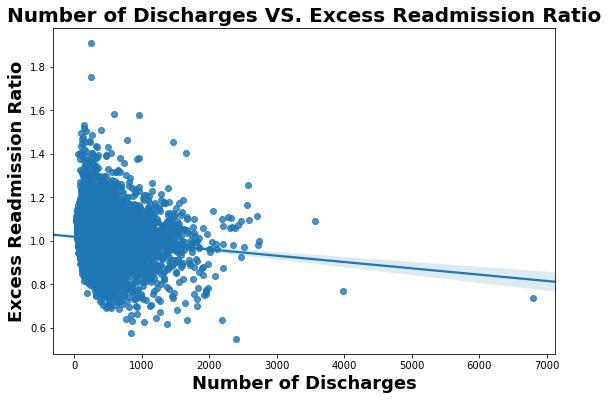

In [21]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('Number of Discharges VS. Excess Readmission Ratio',weight = 'bold', size =20)
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data = clean_hospital_read_df)
plt.xlabel('Number of Discharges', weight = 'bold',size =18)
plt.ylabel('Excess Readmission Ratio', weight = 'bold', size=18)

## A. I agree with the statistical analysis in the report based on the results of the z-test and permutation sample tests performed below. Although, I am hesitant to agree with the recommendation of consolidating small capacity hospitals (< 300) because I do not know how practical this approach would be. Another concern is that reduction and consolidation of hospitals with smaller capacites would most likely affect areas with low population density such as rural areas, and this consolidation could be burdensome to the local communities by making it harder for people in these areas to access health care. In addition, the closing/consolidation of smaller hospitals may eliminate many jobs in these communities and place an undue economic hardship on these areas. 

## B. 

## The z-test for two samples

In [22]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(discharge_more, discharge_less)
print('p value:')
print(float(pval))
print()
print('At 1% significance level:')
if pval<0.01:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value:
8.247694433231281e-24

At 1% significance level:
Reject null hypothesis


## Based on the z-test, there is a significant difference in Excess Readmission Ratio between low capacity and high capacity hospitals. The null hypothesis is rejected because the p value from the z-test is less than the significance level of 0.01. Therefore, smaller hospitals with lower number of discharges have a statistically significant difference in Excess Readmission Ratio from that of larger hospitals that have higher number of discharges.

## The Permutation Sample Approach:

##     Combine data for excess readmission rate for both types of hospitals, scramble them, then create permuation samples, and calculate the difference in mean excess readmission rate for the two permutation samples. Repeat this process 10000 times and record the calculated difference in means and compare the observed difference in means for the two types of hospitals.

In [23]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[0:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [24]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
       # Generate permutation sample
       perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

       # Compute the test statistic
       perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [25]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [26]:
perm_less,perm_more = permutation_sample(discharge_less, discharge_more)
#perm_less

In [27]:
#perm_more

In [28]:
print(len(perm_more))
print(len(perm_less))

463
1188


In [29]:
empirical_diff_mean_err = np.mean(discharge_less) - np.mean(discharge_more)
empirical_diff_mean_err

0.04428292900204345

In [30]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(discharge_less,discharge_more ,
                                diff_of_means , size=10000)

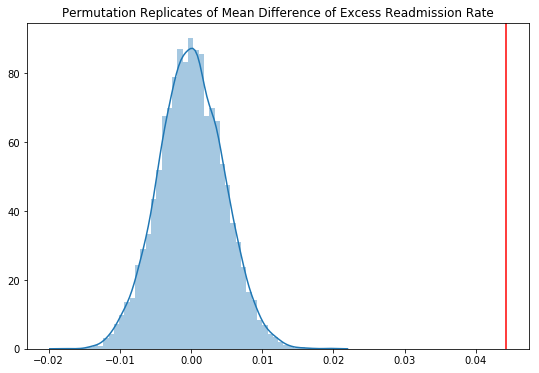

In [31]:
plt.figure(figsize = [9,6])
sns.distplot(perm_replicates)
plt.axvline(x=empirical_diff_mean_err,color ='red')
plt.title('Permutation Replicates of Mean Difference of Excess Readmission Rate')

In [32]:
# Compute and print the p-value: p
p = np.sum( perm_replicates >= empirical_diff_mean_err) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


## As shown in the vertical red line in the above graph, the observed difference in mean Excess Readmission Rate has a extremely low chance of being observed in a permutation sample replicate distribution. The calculated p value is below the significance level,α, of 0.01. Therefore, the observed difference in Excess Readmission Rates between hospitals with number of discharges < 100 & hospitals with number of discharges > 1000 is statistically significant. 


## The difference in the Excess Readmission Rate IS statistically significant. The observed difference in this rate between hospitals with low number of discharges and hospitals with large number of discharges is only ~ 0.045. How important this difference is in terms of practical signifcance depends on how important the metric of Excess Readmission Rate is to the performance of a hospital and the people who evaluate hospitals' performance.

In [33]:
# create a function to create a categorical column for the dataframe
def discharge_cat(number_discharges):
    if number_discharges > 1000:
        return 'more_than_1000'
    elif number_discharges < 100:
        return 'less_than_100'
    else:
        return 'medium'

In [34]:
clean_hospital_read_df['Discharge_Category'] = clean_hospital_read_df['Number of Discharges'].apply(discharge_cat)

In [35]:
# create a boolean mask to filter out data in between < 100 discharges & > 1000 discharges
mask = clean_hospital_read_df['Discharge_Category'] != 'medium'

In [36]:
# use boolean mask & use filter to select only 3 columns in the original dataframe
df = clean_hospital_read_df[mask].filter(items=['Discharge_Category', 'Excess Readmission Ratio','Number of Discharges'])

In [37]:
df.tail(23)

,Discharge_Category,Excess Readmission Ratio,Number of Discharges
12910,more_than_1000,0.8747,2196
2758,more_than_1000,1.0663,2198
7934,more_than_1000,0.9831,2209
1352,more_than_1000,1.1099,2278
3042,more_than_1000,1.0605,2314
1448,more_than_1000,1.1055,2318
2846,more_than_1000,1.0647,2341
8249,more_than_1000,0.9788,2353
3202,more_than_1000,1.0571,2388
13730,more_than_1000,0.5495,2393


In [38]:
df.Discharge_Category.value_counts()

less_than_100     1269
more_than_1000     463
Name: Discharge_Category, dtype: int64

## The original scatterplot has data that is very noisy and shows the difference between the high capacity & low capacity hospitals in terms of excess readmission ratio. Visually, it might be easier to compare the two types  of hospitals side by side using a barplot or boxplot as shown below. For these graphs, a categorical variable was constructed based on the number of discharges for that hospital.

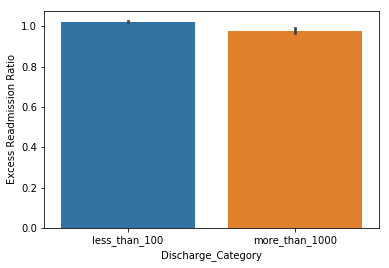

In [39]:
sns.barplot(x="Discharge_Category", y="Excess Readmission Ratio", data= df)

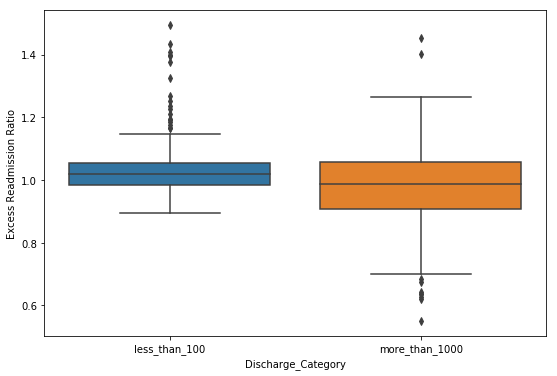

In [40]:
plt.figure(figsize = [9,6])
sns.boxplot(x="Discharge_Category", y="Excess Readmission Ratio", data= df)